In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.style.use('seaborn-bright')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from xgboost import XGBRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from statsmodels.graphics.tsaplots import *
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\moham\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
data = pd.read_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\QBDaily.csv', index_col=0, parse_dates=True)

data.head()

,Electric,Gas,Water,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,,,
2008-03-03,50.036833,187.283062,0.255979,4.422917,-0.175417,1010.041667,72.250000,5.371667
2008-03-04,79.146396,152.284854,0.252188,3.310000,-0.861250,1026.375000,75.208333,5.100000
2008-03-05,80.725021,151.048396,0.249979,4.049167,0.947083,1033.000000,80.291667,4.379167
2008-03-06,79.155750,102.277521,0.248687,9.252500,5.157500,1021.916667,75.791667,5.761250
2008-03-07,77.895188,102.198229,0.239896,7.638750,2.673333,1010.166667,71.750000,6.660833


In [3]:
data.describe()

,Electric,Gas,Water,temp,dew_point,pressure,humidity,wind_speed
count,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000
mean,52.847789,63.188462,0.152293,10.450578,7.288458,1014.369938,81.968717,4.415995
std,13.789697,78.212925,0.139383,5.351245,4.738956,11.007041,8.490008,1.797710
min,9.531250,0.000000,0.000000,-6.250000,-6.898750,968.916667,53.083333,0.822917
25%,43.008630,0.788792,0.069891,6.446667,3.754896,1007.708333,75.833333,3.082708
50%,52.544240,34.542760,0.128104,10.483125,7.496667,1015.437500,82.375000,4.195000
75%,62.688771,113.262807,0.193937,14.720104,11.012292,1021.802083,88.458333,5.531458
max,87.564042,794.473687,0.945417,26.625417,18.644167,1047.125000,100.000000,12.804583


In [4]:
X, y = data.drop('Electric', axis=1), data['Electric']

X

,Gas,Water,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,,
2008-03-03,187.283062,0.255979,4.422917,-0.175417,1010.041667,72.250000,5.371667
2008-03-04,152.284854,0.252188,3.310000,-0.861250,1026.375000,75.208333,5.100000
2008-03-05,151.048396,0.249979,4.049167,0.947083,1033.000000,80.291667,4.379167
2008-03-06,102.277521,0.248687,9.252500,5.157500,1021.916667,75.791667,5.761250
2008-03-07,102.198229,0.239896,7.638750,2.673333,1010.166667,71.750000,6.660833
...,...,...,...,...,...,...,...
2022-02-25,179.802021,0.000000,6.274167,2.117083,1024.291667,75.083333,5.198333
2022-02-26,1.858500,0.000000,5.840417,1.968750,1028.250000,76.916667,5.150833
2022-02-27,1.626187,0.000000,5.664583,0.662917,1023.250000,71.291667,5.717917


In [5]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<AxesSubplot:xlabel='Datetime'>

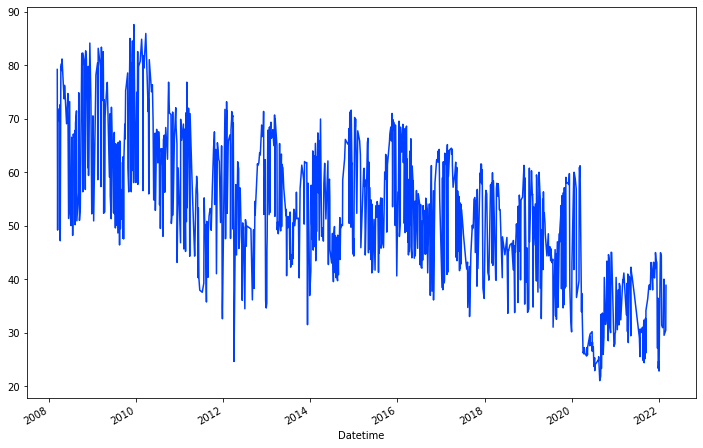

In [12]:
y_test.plot()

In [7]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree = 1, learning_rate = 0.1, max_depth = 7, alpha = 10, n_estimators = 5000)

# XGBRegressor(objective='reg:squarederror',
#     n_estimators=5000,
#     learning_rate=0.1,
#     subsample=0.5,
#     colsample_bytree=1, 
#     max_depth=7,
# )

In [8]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [14]:
preds = pd.DataFrame(preds)

<AxesSubplot:>

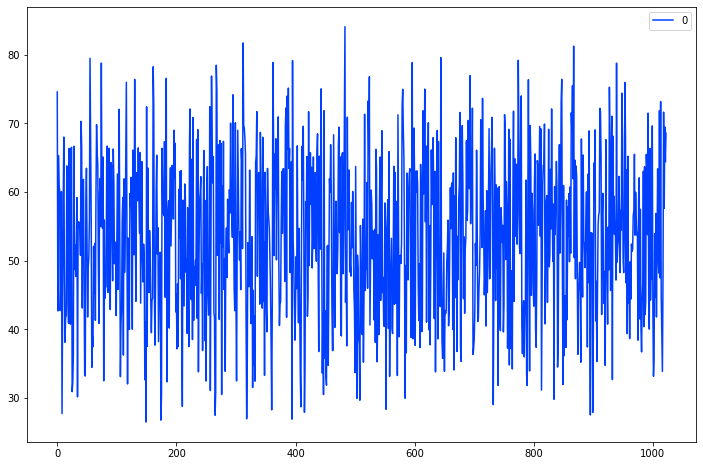

In [15]:
preds.plot()

In [9]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)


print("RMSE: %f" % (rmse))
print("MSE: %f" % (mse))
print("MAE: %f" % (mae))
print("R2 Score: %f" % (r2))

RMSE: 8.178138
MSE: 66.881934
MAE: 6.264119
R2 Score: 0.638689


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

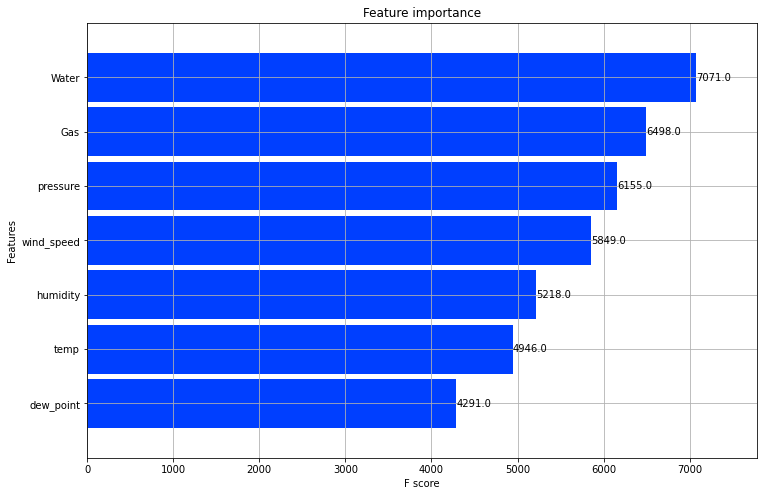

In [10]:
from xgboost import plot_importance

feature_importance = plot_importance(xg_reg, height=0.9)
feature_importance

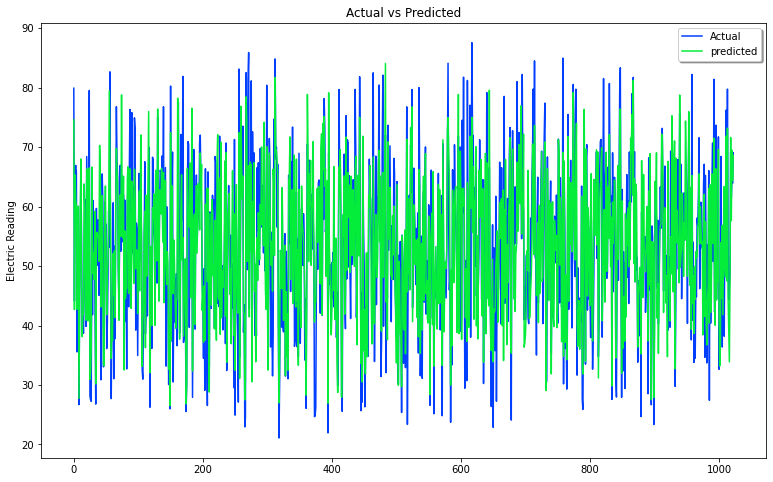

In [11]:
plt.figure(figsize=(13,8))
plt.plot(list(y_test))
plt.plot(list(preds))
plt.title("Actual vs Predicted")
plt.ylabel("Electric Reading")
plt.legend(('Actual','predicted'), shadow=True)
plt.show()

In [27]:
params = {"objective":"reg:squarederror",'colsample_bytree': 1,'learning_rate': 0.1,
                'max_depth': 7, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [28]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,58.534523,0.173193,58.543568,0.371897
1,52.893976,0.154756,52.911167,0.341467
2,47.828367,0.137877,47.856969,0.322112
3,43.279315,0.125185,43.325380,0.300958
4,39.201290,0.112697,39.272175,0.288383


In [29]:
print((cv_results["test-rmse-mean"]).tail(1))

49    9.427558
Name: test-rmse-mean, dtype: float64
